In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scanpy as sc
import scipy.io as sio
import anndata as ad
import seaborn as sns
import os as os
import sys as sys
sys.path.append('/home/qiuaodon/Desktop/PanCancer_scRNA_analysis/utils/')
from scRNA_utils import *
import operator as op
import matplotlib.colors as mcolors

In [2]:
data_dir_NHDP = "/home/qiuaodon/Desktop/project_data_new/"
adata_T = sc.read(data_dir_NHDP + "1863-counts_cells_cohort1_T_cells_annotated.h5ad")
adata_M = sc.read(data_dir_NHDP + '1863-counts_cells_cohort1_M_cells.h5ad')
adata_B = sc.read(data_dir_NHDP + '1863-counts_cells_cohort1_B_cells.h5ad')
adata_Fibro = sc.read(data_dir_NHDP + '1863-counts_cells_cohort1_Fibro_cells.h5ad')
adata_Endo = sc.read(data_dir_NHDP + '1863-counts_cells_cohort1_Endo_cells.h5ad')
adata_Epi = sc.read(data_dir_NHDP + '1863-counts_cells_cohort1_Epi_cells.h5ad')

In [4]:
adata_T.obs

,patient_id,sample_id,timepoint,treatment,expansion,BC_type,cellType,n_genes,n_counts,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,cell_type
BIOKEY_13_Pre_AAACCTGCAAGAAGAG-1,BIOKEY_13,BIOKEY_13_Pre,pre,treatment_naive,NaN,HER2+,T_cell,700,1252.0,700,1252.0,51.0,4.073483,6,CD8 EM
BIOKEY_13_Pre_AAAGATGAGCAGGCTA-1,BIOKEY_13,BIOKEY_13_Pre,pre,treatment_naive,NaN,HER2+,T_cell,627,1000.0,627,1000.0,60.0,6.000000,0,CD4 EM
BIOKEY_13_Pre_AAAGATGCAAGCCGTC-1,BIOKEY_13,BIOKEY_13_Pre,pre,treatment_naive,NaN,HER2+,T_cell,681,1288.0,681,1288.0,72.0,5.590062,1,CD8 EM
BIOKEY_13_Pre_AAAGATGGTTTGACAC-1,BIOKEY_13,BIOKEY_13_Pre,pre,treatment_naive,NaN,HER2+,T_cell,789,2056.0,789,2056.0,118.0,5.739300,0,CD4 EM
BIOKEY_13_Pre_AAAGATGTCAACGCTA-1,BIOKEY_13,BIOKEY_13_Pre,pre,treatment_naive,NaN,HER2+,T_cell,634,1224.0,634,1224.0,50.0,4.084968,6,CD8 EM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BIOKEY_24_On_TTGTAGGTCACTGGGC-1,BIOKEY_24,BIOKEY_24_On,on,treatment_naive,NE,ER+,T_cell,981,2639.0,981,2639.0,161.0,6.100796,1,CD8 EM
BIOKEY_24_On_TTTACTGCACCATCCT-1,BIOKEY_24,BIOKEY_24_On,on,treatment_naive,NE,ER+,T_cell,995,2409.0,995,2409.0,126.0,5.230386,1,CD8 EM
BIOKEY_24_On_TTTACTGTCCATGCTC-1,BIOKEY_24,BIOKEY_24_On,on,treatment_naive,NE,ER+,T_cell,893,1915.0,893,1915.0,127.0,6.631854,6,CD8 EM
BIOKEY_24_On_TTTGCGCCACTGTTAG-1,BIOKEY_24,BIOKEY_24_On,on,treatment_naive,NE,ER+,T_cell,1076,2602.0,1076,2602.0,195.0,7.494235,1,CD8 EM


In [3]:
adata_T_CD8EX = adata_T[adata_T.obs['cell_type'] == 'CD8 EX']
adata_T_CD4EX = adata_T[adata_T.obs['cell_type'] == 'CD4 EX']

/home/qiuaodon/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [12]:
adata_M.obs['cell_type']

BIOKEY_13_Pre_AAACCTGTCAACGAAA-1      Monocyte
BIOKEY_13_Pre_AAACGGGCACAGAGGT-1    Macrophage
BIOKEY_13_Pre_AAATGCCAGCCTTGAT-1      Monocyte
BIOKEY_13_Pre_AAATGCCGTCAGTGGA-1      Monocyte
BIOKEY_13_Pre_AACCATGCAGTAAGAT-1      Monocyte
                                       ...    
BIOKEY_24_On_TTCTTAGTCTTGACGA-1       Monocyte
BIOKEY_24_On_TTGAACGCACAACGTT-1       Monocyte
BIOKEY_24_On_TTGGAACAGCGTTCCG-1       Monocyte
BIOKEY_24_On_TTTCCTCAGACAAAGG-1       Monocyte
BIOKEY_24_On_TTTGTCATCGGTTAAC-1       Monocyte
Name: cell_type, Length: 12378, dtype: category
Categories (4, object): ['Dendritic', 'Macrophage', 'Mast cell', 'Monocyte']

In [6]:
adata_M_DC = adata_M[adata_M.obs['cell_type'] == 'Dendritic']

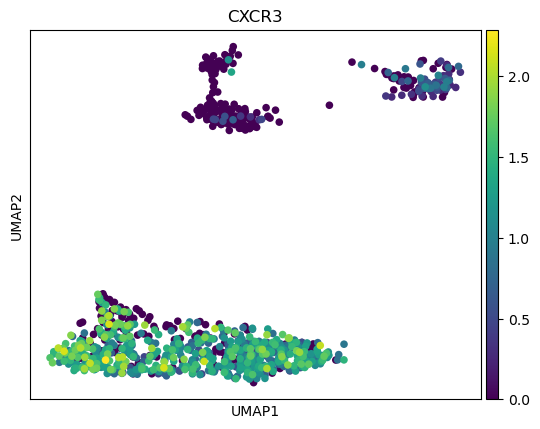

In [19]:
sc.pl.umap(adata_M_DC, color = 'CXCR3')

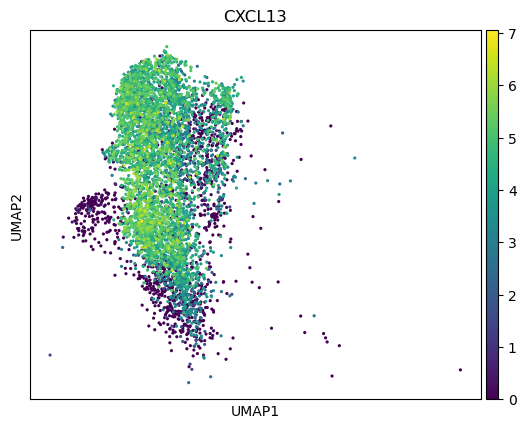

In [20]:
sc.pl.umap(adata_T_CD4EX, color = 'CXCL13')

In [22]:
adata_M_pseudo = scRNA2PseudoBulkAnnData(adata_M_DC, sample_id_col='sample_id')
adata_T_pseudo = scRNA2PseudoBulkAnnData(adata_T_CD4EX, sample_id_col='sample_id')

/home/qiuaodon/Desktop/PanCancer_scRNA_analysis/utils/scRNA_utils.py:371: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'HER2+' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_obs.loc[sample, col] = adata.obs.loc[adata.obs[sample_id_col] == sample, col].unique()[0]
/home/qiuaodon/Desktop/PanCancer_scRNA_analysis/utils/scRNA_utils.py:371: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Myeloid_cell' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_obs.loc[sample, col] = adata.obs.loc[adata.obs[sample_id_col] == sample, col].unique()[0]
/home/qiuaodon/Desktop/PanCancer_scRNA_analysis/utils/scRNA_utils.py:371: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'HER2+' has dtype incompatible with 

In [23]:
DEG_2 = pd.read_excel(data_dir_NHDP + 'M_DC_DEGs.xlsx')
DEG_1 = pd.read_csv(data_dir_NHDP + 'CD4EX_DEGs.csv')

In [24]:
adata_M_pseudo = adata_M_pseudo[adata_M_pseudo.obs['sample_id'].isin(adata_T_pseudo.obs['sample_id'])]
adata_T_pseudo = adata_T_pseudo[adata_T_pseudo.obs['sample_id'].isin(adata_M_pseudo.obs['sample_id'])]

/home/qiuaodon/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [25]:
#name first column as gene
DEG_1 = DEG_1.rename(columns = {'Unnamed: 0':'gene'})
DEG_2 = DEG_2.rename(columns = {'Unnamed: 0':'gene'})
# filter DEGs by pval < 0.01
DEG_1 = DEG_1[DEG_1['pval'] < 0.01]
DEG_2 = DEG_2[DEG_2['pval'] < 0.01]
gene_T = DEG_1['gene'].tolist()
gene_M = DEG_2['gene'].tolist()
gene_T_matrix = adata_T_pseudo[:, gene_T].X
gene_M_matrix = adata_M_pseudo[:, gene_M].X
gene_T_df = pd.DataFrame(gene_T_matrix, columns=gene_T, index=adata_T_pseudo.obs['sample_id'])
gene_M_df = pd.DataFrame(gene_M_matrix, columns=gene_M, index=adata_M_pseudo.obs['sample_id'])
gene_T_df.columns = [i + '_T' for i in gene_T_df.columns]
gene_M_df.columns = [i + '_M' for i in gene_M_df.columns]
gene_df = pd.merge(gene_T_df, gene_T_df, on='sample_id')
gene_df = pd.merge(gene_df, gene_M_df, on='sample_id')

/home/qiuaodon/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/qiuaodon/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [27]:
gene_df.columns = gene_df.columns.str.replace('_x', '')
gene_df

,AC016596.1_T,ANKRD28_T,ANXA1_T,AREG_T,BHLHE40_T,BIRC3_T,CBLB_T,CD7_T,CEMIP2_T,CH25H_T,...,SIDT1_M,SMIM3_M,SOCS1_M,TBC1D8_M,TSC22D3_M,TSPYL2_M,VASH2_M,VIPR2_M,ZFP36L2_M,FAM160A1_M
sample_id,,,,,,,,,,,,,,,,,,,,,
BIOKEY_13_Pre,0.000000,118.917480,1186.358887,216.909042,1204.874756,1415.703979,856.924683,2728.684814,707.211304,0.000000,...,554.913086,1126.045898,1116.393188,1820.265747,2652.479980,2576.314453,0.000000,175.845673,2787.042236,0.000000
BIOKEY_10_Pre,7.727849,284.963806,478.224030,19.851547,2611.807373,1432.351440,1373.103027,4277.469727,715.221313,5.772510,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BIOKEY_10_On,15.073813,1078.547607,282.848053,586.610291,1729.484619,1505.581787,2302.618896,4854.040527,1622.615723,224.218918,...,1208.485962,1230.697510,2679.707520,1091.564575,2894.975586,2011.316406,479.455566,537.603577,3316.640381,270.479095
BIOKEY_16_Pre,0.000000,285.869720,849.815735,110.626846,1131.744995,1703.812012,1553.852783,2205.681641,1348.889893,16.267012,...,864.111877,765.497864,1587.410400,1376.694580,1998.820068,1232.930542,1174.610840,0.000000,2834.621338,87.055229
BIOKEY_16_On,33.586521,576.475891,548.139465,185.645493,817.009277,1803.656982,1773.845093,3231.192871,1451.864990,305.327454,...,1604.290039,1691.398804,3297.435547,1583.729248,2802.145752,1531.308105,978.210266,101.746338,3285.658447,328.918518
BIOKEY_14_Pre,0.000000,248.653320,2756.308105,565.365295,1085.724976,2797.179443,439.897888,3682.539062,1376.681885,0.000000,...,2005.947266,951.124695,554.263855,1275.428955,1987.521973,2487.031006,383.992432,164.594742,2912.165771,1162.178223
BIOKEY_14_On,0.000000,610.993042,860.543579,264.318817,1045.345703,3006.624512,1148.578491,3887.263184,2546.623779,949.291077,...,2546.445312,4432.153320,2865.650635,1296.813965,4118.000000,2838.443848,1417.711792,1403.474243,5107.101562,1417.711792
BIOKEY_19_Pre,0.000000,372.584839,306.364990,0.000000,1461.196899,1063.528687,990.778931,4766.344727,1298.876831,0.000000,...,1686.081055,714.541931,0.000000,297.950867,3129.588379,2430.407959,979.049805,342.294952,4182.321777,727.737488
BIOKEY_19_On,84.314873,143.185394,553.460999,271.886047,1021.876099,2021.465454,1269.722046,3579.724609,1741.512329,174.428131,...,1356.592529,1331.750366,1899.844727,1909.068604,3036.970703,2075.479980,830.521301,464.000488,3473.912354,194.141571


In [28]:
gene_df['treatment'] = gene_df.index.str.contains('On').astype(int)
# get patient id from sample id remove the _On or _Pre
gene_df['patient_id'] = gene_df.index.str.replace('_On', '').str.replace('_Pre', '')
gene_df['treatment'].value_counts()

treatment
1    25
0    23
Name: count, dtype: int64

In [29]:
# remove the patient id with only one sample
patient_counts = gene_df['patient_id'].value_counts()
single_patient = patient_counts[patient_counts == 1].index.tolist()
gene_df = gene_df[~gene_df['patient_id'].isin(single_patient)]
gene_df['treatment'].value_counts()

treatment
0    19
1    19
Name: count, dtype: int64

In [30]:
adata_T_pseudo = adata_T_pseudo[adata_T_pseudo.obs['sample_id'].isin(gene_df.index)]
adata_M_pseudo = adata_M_pseudo[adata_M_pseudo.obs['sample_id'].isin(gene_df.index)]
adata_T_pseudo.obs['timepoint'].value_counts()

/home/qiuaodon/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


timepoint
pre    19
on     19
Name: count, dtype: int64

In [31]:
DEG_pairs = pd.read_excel('/home/qiuaodon/Desktop/project_data_new/IV_regression_results_CD4EXvsDC.xlsx')
# drop the p_value column and r_squared column
DEG_pairs = DEG_pairs.drop(columns=['p_value', 'r_squared'])
# set the first two columns as g1 and g2 in DEG_pairs
DEG_pairs = DEG_pairs.rename(columns = {'gene_T':'g1', 'gene_cell':'g2'})

In [32]:
for index, row in DEG_pairs.iterrows():
    g1 = row['g1']
    g2 = row['g2']

In [33]:
from causallearn.utils.cit import CIT
results = pd.DataFrame(columns=['g1', 'g2', 'L', 'R', 'pValue'])

for index, row in DEG_pairs.iterrows():
    g1 = row['g1']
    g2 = row['g2']
    if g2.endswith('_M'):
        # for L, R in lrpair_kegg.values:
            # check if L and R can be found in the DEG expression data
           # if L in adata_T_pseudo.var_names and R  in adata_M_pseudo.var_names:
                # get the L_T and R_B from pseudo_T and pseudo_M
                L = 'CXCL13'
                R = 'CXCR3'
                L_T = adata_T_pseudo[:, L].X
                L_T = pd.DataFrame(L_T, columns=[L], index=adata_T_pseudo.obs['sample_id'])
                L_T = L_T.dropna()
                R_M = adata_M_pseudo[:, R].X
                R_M = pd.DataFrame(R_M, columns=[R], index=adata_M_pseudo.obs['sample_id'])
                R_M = R_M.dropna()
                # calculate the L*R
                # Ensure the column names match
                L_T.columns = [R+'_vs_'+L]
                R_M.columns = L_T.columns

                # perform the multiplication and change L_R to 1-dimensional
                L_R = L_T.multiply(R_M, axis=0)
                L_R = L_R.iloc[:,0]

                # make a dataframe g1, g2 and L*R
                if g1 not in gene_df.columns or g2 not in gene_df.columns:
                    continue
                
                g1_T = gene_df[g1]
                g2_M = gene_df[g2]
                df = pd.DataFrame({g1: g1_T, g2: g2_M, 'L*R': L_R})
                # remove the rows with NA
                df = df.dropna()

                # convert df to numpy array
                df_numpy = df.to_numpy()

                fisherz_obj = CIT(df_numpy, "fisherz")
                pValue = fisherz_obj( 0, 1, [2] )
                if pValue > 0.1:
                    results = pd.concat([results, pd.DataFrame({'g1': [g1], 'g2': [g2], 'L': [L], 'R': [R], 'pValue': [pValue]})], ignore_index=True)
                
print(results)

/home/qiuaodon/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/qiuaodon/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/qiuaodon/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/qiuaodon/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, C

           g1         g2       L      R    pValue
0   ANKRD28_T    SOCS1_M  CXCL13  CXCR3  0.395783
1    CRYBG1_T    CXCR3_M  CXCL13  CXCR3  0.104000
2     DTHD1_T     CLN8_M  CXCL13  CXCR3  0.224585
3     DTHD1_T    NEAT1_M  CXCL13  CXCR3  0.130098
4     DTHD1_T  TSC22D3_M  CXCL13  CXCR3  0.593994
..        ...        ...     ...    ...       ...
56  TSC22D3_T   HSPA1B_M  CXCL13  CXCR3  0.344102
57    ZFP36_T    CEBPD_M  CXCL13  CXCR3  0.160587
58  ZFP36L1_T    CXCR3_M  CXCL13  CXCR3  0.588536
59  ZFP36L1_T    DDIT4_M  CXCL13  CXCR3  0.306084
60  ZFP36L1_T  ZFP36L2_M  CXCL13  CXCR3  0.176861

[61 rows x 5 columns]


/home/qiuaodon/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/qiuaodon/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/qiuaodon/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/qiuaodon/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, C

In [34]:
#calculate the correlation between g1 and g2
from scipy.stats import spearmanr 
results['g1vsg2_correlation'] = 0
for index, row in results.iterrows():
    g1 = row['g1']
    g2 = row['g2']
    g1 = g1.replace('_T', '')
    g2 = g2.replace('_M', '')
    # use the adata_T_pseudo and adata_M_pseudo to get the g1 and g2
    g1_T = adata_T_pseudo[:, g1].X
    g1_T = pd.DataFrame(g1_T, columns=[g1], index=adata_T_pseudo.obs['sample_id'])
    g1_T = g1_T.dropna()
    g2_M = adata_M_pseudo[:, g2].X
    g2_M = pd.DataFrame(g2_M, columns=[g2], index=adata_M_pseudo.obs['sample_id'])
    g2_M = g2_M.dropna()
    # make a dataframe g1, g2 and L*R
    corr = spearmanr(g1_T, g2_M)[0]
    results.loc[index, 'g1vsg2_correlation'] = corr
print(results)

/home/qiuaodon/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/qiuaodon/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/tmp/ipykernel_3464115/1841984688.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.3772798580424927' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  results.loc[index, 'g1vsg2_correlation'] = corr
/home/qiuaodon/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be rem

           g1         g2       L      R    pValue  g1vsg2_correlation
0   ANKRD28_T    SOCS1_M  CXCL13  CXCR3  0.395783            0.377280
1    CRYBG1_T    CXCR3_M  CXCL13  CXCR3  0.104000            0.323149
2     DTHD1_T     CLN8_M  CXCL13  CXCR3  0.224585            0.389315
3     DTHD1_T    NEAT1_M  CXCL13  CXCR3  0.130098            0.373845
4     DTHD1_T  TSC22D3_M  CXCL13  CXCR3  0.593994            0.173025
..        ...        ...     ...    ...       ...                 ...
56  TSC22D3_T   HSPA1B_M  CXCL13  CXCR3  0.344102            0.271648
57    ZFP36_T    CEBPD_M  CXCL13  CXCR3  0.160587            0.548176
58  ZFP36L1_T    CXCR3_M  CXCL13  CXCR3  0.588536           -0.279505
59  ZFP36L1_T    DDIT4_M  CXCL13  CXCR3  0.306084           -0.375007
60  ZFP36L1_T  ZFP36L2_M  CXCL13  CXCR3  0.176861           -0.339827

[61 rows x 6 columns]


/home/qiuaodon/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/qiuaodon/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/qiuaodon/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/qiuaodon/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, C

In [35]:
# claculate the correlation between g1 and L
results['g1vsL_correlation'] = 0   
for index, row in results.iterrows():
    g1 = row['g1']
    L = row['L']
    g1 = g1.replace('_T', '')
    # use the adata_T_pseudo and adata_M_pseudo to get the g1 and g2
    g1_T = adata_T_pseudo[:, g1].X
    g1_T = pd.DataFrame(g1_T, columns=[g1], index=adata_T_pseudo.obs['sample_id'])
    g1_T = g1_T.dropna()
    L_T = adata_T_pseudo[:, L].X
    L_T = pd.DataFrame(L_T, columns=[L], index=adata_T_pseudo.obs['sample_id'])
    L_T = L_T.dropna()
    # make a dataframe g1, g2 and L*R
    corr = spearmanr(g1_T, L_T)[0]
    results.loc[index, 'g1vsL_correlation'] = corr

# claculate the correlation between g2 and R
results['g2vsR_correlation'] = 0
for index, row in results.iterrows():
    g2 = row['g2']
    R = row['R']
    g2 = g2.replace('_M', '')
    # use the adata_T_pseudo and adata_M_pseudo to get the g1 and g2
    g2_M = adata_M_pseudo[:, g2].X
    g2_M = pd.DataFrame(g2_M, columns=[g2], index=adata_M_pseudo.obs['sample_id'])
    g2_M = g2_M.dropna()
    R_M = adata_M_pseudo[:, R].X
    R_M = pd.DataFrame(R_M, columns=[R], index=adata_M_pseudo.obs['sample_id'])
    R_M = R_M.dropna()
    # make a dataframe g1, g2 and L*R
    corr = spearmanr(g2_M, R_M)[0]
    results.loc[index, 'g2vsR_correlation'] = corr

/home/qiuaodon/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/qiuaodon/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/tmp/ipykernel_3464115/3987006790.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.10651976780074718' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  results.loc[index, 'g1vsL_correlation'] = corr
/home/qiuaodon/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be rem

In [36]:
# calculate the correlation between g1 and L*R
results['g1vsLR_correlation'] = 0
for index, row in results.iterrows():
    g1 = row['g1']
    g2 = row['g2']
    L = row['L']
    R = row['R']
    g1 = g1.replace('_T', '')
    g2 = g2.replace('_M', '')
    # use the adata_T_pseudo and adata_M_pseudo to get the g1 and g2
    g1_T = adata_T_pseudo[:, g1].X
    g1_T = pd.DataFrame(g1_T, columns=[g1], index=adata_T_pseudo.obs['sample_id'])
    g1_T = g1_T.dropna()
    g2_M = adata_M_pseudo[:, g2].X
    g2_M = pd.DataFrame(g2_M, columns=[g2], index=adata_M_pseudo.obs['sample_id'])
    g2_M = g2_M.dropna()
    L_T = adata_T_pseudo[:, L].X
    L_T = pd.DataFrame(L_T, columns=[L], index=adata_T_pseudo.obs['sample_id'])
    L_T = L_T.dropna()
    R_M = adata_M_pseudo[:, R].X
    R_M = pd.DataFrame(R_M, columns=[R], index=adata_M_pseudo.obs['sample_id'])
    R_M = R_M.dropna()
    # calculate the L*R
    # Ensure the column names match
    L_T.columns = [R+'_vs_'+L]
    R_M.columns = L_T.columns

    # perform the multiplication and change L_R to 1-dimensional
    L_R = L_T.multiply(R_M, axis=0)
    L_R = L_R.iloc[:,0]
    # make a dataframe g1, g2 and L*R
    corr = spearmanr(g1_T, L_R)[0]
    results.loc[index, 'g1vsLR_correlation'] = corr

# calculate the correlation between g2 and L*R
results['g2vsLR_correlation'] = 0
for index, row in results.iterrows():
    g1 = row['g1']
    g2 = row['g2']
    L = row['L']
    R = row['R']
    g1 = g1.replace('_T', '')
    g2 = g2.replace('_M', '')
    # use the adata_T_pseudo and adata_M_pseudo to get the g1 and g2
    g1_T = adata_T_pseudo[:, g1].X
    g1_T = pd.DataFrame(g1_T, columns=[g1], index=adata_T_pseudo.obs['sample_id'])
    g1_T = g1_T.dropna()
    g2_M = adata_M_pseudo[:, g2].X
    g2_M = pd.DataFrame(g2_M, columns=[g2], index=adata_M_pseudo.obs['sample_id'])
    g2_M = g2_M.dropna()
    L_T = adata_T_pseudo[:, L].X
    L_T = pd.DataFrame(L_T, columns=[L], index=adata_T_pseudo.obs['sample_id'])
    L_T = L_T.dropna()
    R_M = adata_M_pseudo[:, R].X
    R_M = pd.DataFrame(R_M, columns=[R], index=adata_M_pseudo.obs['sample_id'])
    R_M = R_M.dropna()
    # calculate the L*R
    # Ensure the column names match
    L_T.columns = [R+'_vs_'+L]
    R_M.columns = L_T.columns

    # perform the multiplication and change L_R to 1-dimensional
    L_R = L_T.multiply(R_M, axis=0)
    L_R = L_R.iloc[:,0]
    # make a dataframe g1, g2 and L*R
    corr = spearmanr(g2_M, L_R)[0]
    results.loc[index, 'g2vsLR_correlation'] = corr


/home/qiuaodon/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/qiuaodon/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/qiuaodon/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/qiuaodon/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, C

In [37]:
from scipy.stats import spearmanr
import statsmodels.api as sm

# Initialize the correlation column in results DataFrame
results['g1vsresiduals_correlation'] = 0

for index, row in results.iterrows():
    g1 = row['g1']
    g2 = row['g2']
    L = row['L']
    R = row['R']
    g1 = g1.replace('_T', '')
    g2 = g2.replace('_M', '')

    # Extract the expression data from adata_T_pseudo and adata_M_pseudo
    g1_T = adata_T_pseudo[:, g1].X.toarray().flatten()
    g2_M = adata_M_pseudo[:, g2].X.toarray().flatten()
    L_T = adata_T_pseudo[:, L].X.toarray().flatten()
    R_M = adata_M_pseudo[:, R].X.toarray().flatten()

    # Ensure the column names match for L and R
    L_R = L_T * R_M

    # Create a DataFrame with g1, g2, and L*R
    df = pd.DataFrame({g1: g1_T, g2: g2_M, 'L*R': L_R})
    df = df.dropna()

    # Perform the regression of g2 on L*R to get residuals
    X = sm.add_constant(df['L*R'])  # Add a constant term to the predictor
    y = df[g2]
    model = sm.OLS(y, X).fit()
    residuals = model.resid

    # Calculate the correlation between g1 and residuals
    corr = spearmanr(df[g1], residuals)[0]

    # Update the results DataFrame with the correlation
    results.at[index, 'g1vsresiduals_correlation'] = corr

results


/home/qiuaodon/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/tmp/ipykernel_3464115/3317039306.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.2470612129425622' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  results.at[index, 'g1vsresiduals_correlation'] = corr
/home/qiuaodon/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/qiuaodon/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will 

,g1,g2,L,R,pValue,g1vsg2_correlation,g1vsL_correlation,g2vsR_correlation,g1vsLR_correlation,g2vsLR_correlation,g1vsresiduals_correlation
0,ANKRD28_T,SOCS1_M,CXCL13,CXCR3,0.395783,0.377280,0.106520,0.496627,0.372143,0.474580,0.247061
1,CRYBG1_T,CXCR3_M,CXCL13,CXCR3,0.104000,0.323149,-0.195360,1.000000,0.085304,0.647278,0.251971
2,DTHD1_T,CLN8_M,CXCL13,CXCR3,0.224585,0.389315,0.437361,0.660346,0.477256,0.505151,0.212849
3,DTHD1_T,NEAT1_M,CXCL13,CXCR3,0.130098,0.373845,0.437361,0.192478,0.477256,0.214595,0.282121
4,DTHD1_T,TSC22D3_M,CXCL13,CXCR3,0.593994,0.173025,0.437361,0.475252,0.477256,0.264126,0.034027
...,...,...,...,...,...,...,...,...,...,...,...
56,TSC22D3_T,HSPA1B_M,CXCL13,CXCR3,0.344102,0.271648,-0.191596,0.366476,0.174622,0.460482,0.235494
57,ZFP36_T,CEBPD_M,CXCL13,CXCR3,0.160587,0.548176,-0.073422,0.187481,0.361835,0.193514,0.570975
58,ZFP36L1_T,CXCR3_M,CXCL13,CXCR3,0.588536,-0.279505,0.053069,1.000000,-0.242720,0.647278,-0.001861
59,ZFP36L1_T,DDIT4_M,CXCL13,CXCR3,0.306084,-0.375007,0.053069,0.556304,-0.242720,0.167844,-0.338239


In [38]:
from scipy.stats import spearmanr
import statsmodels.api as sm
import pandas as pd

# Initialize the correlation column in results DataFrame
results['g1_residualvsg2_residuals_correlation'] = 0

for index, row in results.iterrows():
    g1 = row['g1']
    g2 = row['g2']
    L = row['L']
    R = row['R']
    g1 = g1.replace('_T', '')
    g2 = g2.replace('_M', '')

    # Extract the expression data from adata_T_pseudo and adata_M_pseudo
    g1_T = adata_T_pseudo[:, g1].X.toarray().flatten()
    g2_M = adata_M_pseudo[:, g2].X.toarray().flatten()
    L_T = adata_T_pseudo[:, L].X.toarray().flatten()
    R_M = adata_M_pseudo[:, R].X.toarray().flatten()

    # Ensure the column names match for L and R
    L_R = L_T * R_M

    # Create DataFrames with g1, g2, and L*R
    df_g1 = pd.DataFrame({g1: g1_T, 'L*R': L_R})
    df_g2 = pd.DataFrame({g2: g2_M, 'L*R': L_R})
    df_g1 = df_g1.dropna()
    df_g2 = df_g2.dropna()

    # Perform the regression of g1 on L*R to get residuals
    X_g1 = sm.add_constant(df_g1['L*R'])  # Add a constant term to the predictor
    y_g1 = df_g1[g1]
    model_g1 = sm.OLS(y_g1, X_g1).fit()
    residuals_g1 = model_g1.resid

    # Perform the regression of g2 on L*R to get residuals
    X_g2 = sm.add_constant(df_g2['L*R'])  # Add a constant term to the predictor
    y_g2 = df_g2[g2]
    model_g2 = sm.OLS(y_g2, X_g2).fit()
    residuals_g2 = model_g2.resid

    # Calculate the correlation between the residuals of g1 and g2
    corr = spearmanr(residuals_g1, residuals_g2)[0]

    # Update the results DataFrame with the correlation
    results.at[index, 'g1_residualvsg2_residuals_correlation'] = corr

results


/home/qiuaodon/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/tmp/ipykernel_3464115/1473775680.py:47: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.20043787629994528' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  results.at[index, 'g1_residualvsg2_residuals_correlation'] = corr
/home/qiuaodon/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/qiuaodon/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is depreca

,g1,g2,L,R,pValue,g1vsg2_correlation,g1vsL_correlation,g2vsR_correlation,g1vsLR_correlation,g2vsLR_correlation,g1vsresiduals_correlation,g1_residualvsg2_residuals_correlation
0,ANKRD28_T,SOCS1_M,CXCL13,CXCR3,0.395783,0.377280,0.106520,0.496627,0.372143,0.474580,0.247061,0.200438
1,CRYBG1_T,CXCR3_M,CXCL13,CXCR3,0.104000,0.323149,-0.195360,1.000000,0.085304,0.647278,0.251971,0.261660
2,DTHD1_T,CLN8_M,CXCL13,CXCR3,0.224585,0.389315,0.437361,0.660346,0.477256,0.505151,0.212849,0.242554
3,DTHD1_T,NEAT1_M,CXCL13,CXCR3,0.130098,0.373845,0.437361,0.192478,0.477256,0.214595,0.282121,0.311388
4,DTHD1_T,TSC22D3_M,CXCL13,CXCR3,0.593994,0.173025,0.437361,0.475252,0.477256,0.264126,0.034027,0.076300
...,...,...,...,...,...,...,...,...,...,...,...,...
56,TSC22D3_T,HSPA1B_M,CXCL13,CXCR3,0.344102,0.271648,-0.191596,0.366476,0.174622,0.460482,0.235494,0.211736
57,ZFP36_T,CEBPD_M,CXCL13,CXCR3,0.160587,0.548176,-0.073422,0.187481,0.361835,0.193514,0.570975,0.461530
58,ZFP36L1_T,CXCR3_M,CXCL13,CXCR3,0.588536,-0.279505,0.053069,1.000000,-0.242720,0.647278,-0.001861,-0.064484
59,ZFP36L1_T,DDIT4_M,CXCL13,CXCR3,0.306084,-0.375007,0.053069,0.556304,-0.242720,0.167844,-0.338239,-0.371505


In [39]:
results.to_excel('/home/qiuaodon/Desktop/project_data_new/CIT_results_CD4EXvsDC_CXCL13.xlsx')

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import spearmanr

def plot_CIT_DEGcorr(g1, g2, L, R, DEG_exp, pseudo_1, pseudo_2):
    # Define a custom palette
    palette = {'pre': "#E69F00", 'on': "#56B4E9"}
    #replace the treatment column 0 pre and 1 on
    gene_df['treatment'] = gene_df['treatment'].replace({0: 'pre', 1: 'on'})
    # Set font sizes
    title_fontsize = 14
    axis_fontsize = 14
    legend_fontsize = 12

    def adjust_plot_limits(ax, x_data, y_data):
        x_min, x_max = x_data.min(), x_data.max()
        y_min, y_max = y_data.min(), y_data.max()
        x_padding = (x_max - x_min) * 0.1
        y_padding = (y_max - y_min) * 0.1
        ax.set_xlim(x_min - x_padding, x_max + x_padding)
        ax.set_ylim(y_min - y_padding, y_max + y_padding)

    # Plot the jointplot between DEG of g1 and g2
    g1_exp = DEG_exp[g1]
    g2_exp = DEG_exp[g2]
    df1 = pd.DataFrame({g1: g1_exp, g2: g2_exp, 'treatment': DEG_exp['treatment']})
    df1 = df1.dropna()
    g = sns.jointplot(x=g1, y=g2, data=df1, hue='treatment', palette=palette, kind='scatter', marginal_kws=dict(fill=True))
    sns.regplot(x=g1, y=g2, data=df1, scatter=False, ax=g.ax_joint, color='black')
    adjust_plot_limits(g.ax_joint, df1[g1], df1[g2])
    # set the xlimit
    g.ax_joint.set_xlim(0, 5000)
    g.ax_joint.set_ylim(0, 3000)
    g.ax_joint.tick_params(left=False, bottom=False)
    g.ax_marg_x.tick_params(bottom=False)
    g.ax_marg_y.tick_params(left=False)
    cor = spearmanr(df1[g1], df1[g2])[0]
    plt.suptitle(f'Correlation between {g1} and {g2} is {cor:.3f}', fontsize=title_fontsize)
    plt.subplots_adjust(top=0.95)
    plt.show()

     # Plot the jointplot between DEG of g1 and g2 residue
    L_values = pseudo_1[:, L].X.toarray().flatten()
    R_values = pseudo_2[:, R].X.toarray().flatten()
    L_R = L_values * R_values
    X = sm.add_constant(L_R)

    # Fit OLS model for g2
    model_g2 = sm.OLS(g2_exp, X).fit()
    residuals_g2 = model_g2.resid

    # Fit OLS model for g1
    model_g1 = sm.OLS(g1_exp, X).fit()
    residuals_g1 = model_g1.resid

    #   Create DataFrame for residuals
    df_res = pd.DataFrame({
        'G_1_residual': residuals_g1,
        'G_2_residual': residuals_g2,
        'treatment': DEG_exp['treatment']
    })

    # Plot the residuals
    g = sns.jointplot(x='G_1_residual', y='G_2_residual', data=df_res, hue='treatment', palette=palette, kind='scatter', marginal_kws=dict(fill=True))
    sns.regplot(x='G_1_residual', y='G_2_residual', data=df_res, scatter=False, ax=g.ax_joint, color='black')

    # Adjust plot limits if needed
    adjust_plot_limits(g.ax_joint, df_res['G_1_residual'], df_res['G_2_residual'])

    # Customize plot appearance
    g.ax_joint.tick_params(left=False, bottom=False)
    g.ax_marg_x.tick_params(bottom=False)
    g.ax_marg_y.tick_params(left=False)

    # Calculate and display correlation
    corr_res = spearmanr(df_res['G_1_residual'], df_res['G_2_residual'])[0]
    plt.suptitle(f'Correlation between residuals of G_1 and G_2 is {corr_res:.3f}', fontsize=title_fontsize)
    plt.subplots_adjust(top=0.95)
    plt.show()


    # Plot the jointplot between DEG of g1 and L
    L_exp = pseudo_1[:, L].X.toarray().flatten()
    L_exp = pd.DataFrame(L_exp, columns=[L], index=pseudo_1.obs['sample_id'])
    df2 = pd.DataFrame({g1: g1_exp, L: L_exp.iloc[:, 0], 'treatment': DEG_exp['treatment']})
    df2 = df2.dropna()
    g = sns.jointplot(x=g1, y=L, data=df2, hue='treatment', palette=palette, kind='scatter', marginal_kws=dict(fill=True))
    sns.regplot(x=g1, y=L, data=df2, scatter=False, ax=g.ax_joint, color='black')
    adjust_plot_limits(g.ax_joint, df2[g1], df2[L])
    g.ax_joint.tick_params(left=False, bottom=False)
    g.ax_marg_x.tick_params(bottom=False)
    g.ax_marg_y.tick_params(left=False)
    corr2 = spearmanr(df2[g1], df2[L])[0]
    plt.suptitle(f'Correlation between {g1} and {L} is {corr2:.3f}', fontsize=title_fontsize)
    plt.subplots_adjust(top=0.95)
    plt.show()

    # Plot the jointplot between DEG of R and g2
    R_exp = pseudo_2[:, R].X.toarray().flatten()
    R_exp = pd.DataFrame(R_exp, columns=[R], index=pseudo_2.obs['sample_id'])
    df4 = pd.DataFrame({R: R_exp.iloc[:, 0], g2: g2_exp, 'treatment': DEG_exp['treatment']})
    df4 = df4.dropna()
    g = sns.jointplot(x=R, y=g2, data=df4, hue='treatment', palette=palette, kind='scatter', marginal_kws=dict(fill=True))
    sns.regplot(x=R, y=g2, data=df4, scatter=False, ax=g.ax_joint, color='black')
    adjust_plot_limits(g.ax_joint, df4[R], df4[g2])
    g.ax_joint.tick_params(left=False, bottom=False)
    g.ax_marg_x.tick_params(bottom=False)
    g.ax_marg_y.tick_params(left=False)
    corr4 = spearmanr(df4[R], df4[g2])[0]
    plt.suptitle(f'Correlation between {R} and {g2} is {corr4:.3f}', fontsize=title_fontsize)
    plt.subplots_adjust(top=0.95)
    plt.show()

    # # Plot the jointplot between DEG of g1 and g2 residue
    # L_values = pseudo_1[:, L].X.toarray().flatten()
    # R_values = pseudo_2[:, R].X.toarray().flatten()
    # L_R = L_values * R_values
    # X = sm.add_constant(L_R)
    # model = sm.OLS(g2_exp, X).fit()
    # residue = model.resid
    # df_res = pd.DataFrame({g1: g1_exp, 'residue': residue, 'treatment': DEG_exp['treatment']})
    # g = sns.jointplot(x=g1, y='residue', data=df_res, hue='treatment', palette=palette, kind='scatter', marginal_kws=dict(fill=True))
    # sns.regplot(x=g1, y='residue', data=df_res, scatter=False, ax=g.ax_joint, color='black')
    # adjust_plot_limits(g.ax_joint, df_res[g1], df_res['residue'])
    # g.ax_joint.tick_params(left=False, bottom=False)
    # g.ax_marg_x.tick_params(bottom=False)
    # g.ax_marg_y.tick_params(left=False)
    # corr_res = spearmanr(df_res[g1], df_res['residue'])[0]
    # plt.suptitle(f'Correlation between {g1} and residue of {g2} is {corr_res:.3f}', fontsize=title_fontsize)
    # plt.subplots_adjust(top=0.95)
    # plt.show()

    # Plot the jointplot between g1 and L*R
    df3 = pd.DataFrame({g1: g1_exp, L + '*' + R: L_R, 'treatment': DEG_exp['treatment']})
    df3 = df3.dropna()
     # remove the sample with largest number for L*R
    # df3 = df3[df3[L + '*' + R] != df3[L + '*' + R].max()]
    g = sns.jointplot(x=g1, y=L + '*' + R, data=df3, hue='treatment', palette=palette, kind='scatter', marginal_kws=dict(fill=True))
    sns.regplot(x=g1, y=L + '*' + R, data=df3, scatter=False, ax=g.ax_joint, color='black')
    adjust_plot_limits(g.ax_joint, df3[g1], df3[L + '*' + R])
    g.ax_joint.tick_params(left=False, bottom=False)
    g.ax_marg_x.tick_params(bottom=False)
    g.ax_marg_y.tick_params(left=False)
    corr3 = spearmanr(df3[g1], df3[L + '*' + R])[0]
    plt.suptitle(f'Correlation between {g1} and {L}*{R} is {corr3:.3f}', fontsize=title_fontsize)
    plt.subplots_adjust(top=0.95)
    plt.show()

    # Plot the jointplot between g2 and L*R
    df5 = pd.DataFrame({g2: g2_exp, L + '*' + R: L_R, 'treatment': DEG_exp['treatment']})
    df5 = df5.dropna()
    # df5 = df5[df5[L + '*' + R] != df5[L + '*' + R].max()]
    g = sns.jointplot(x=L + '*' + R, y=g2, data=df5, hue='treatment', palette=palette, kind='scatter', marginal_kws=dict(fill=True))
    sns.regplot(x=L + '*' + R, y=g2, data=df5, scatter=False, ax=g.ax_joint, color='black')
    adjust_plot_limits(g.ax_joint, df5[L + '*' + R], df5[g2])
    # remove the sample with largest number for L*R
    g.ax_joint.tick_params(left=False, bottom=False)
    g.ax_marg_x.tick_params(bottom=False)
    g.ax_marg_y.tick_params(left=False)
    corr5 = spearmanr(df5[g2], df5[L + '*' + R])[0]
    plt.suptitle(f'Correlation between {g2} and {L}*{R} is {corr5:.3f}', fontsize=title_fontsize)
    plt.subplots_adjust(top=0.95)
    plt.show()


   



/tmp/ipykernel_3464115/676588022.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gene_df['treatment'] = gene_df['treatment'].replace({0: 'pre', 1: 'on'})
/home/qiuaodon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/qiuaodon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/qiuaodon/anaconda3/lib/python3.11/site-packages/seaborn/_

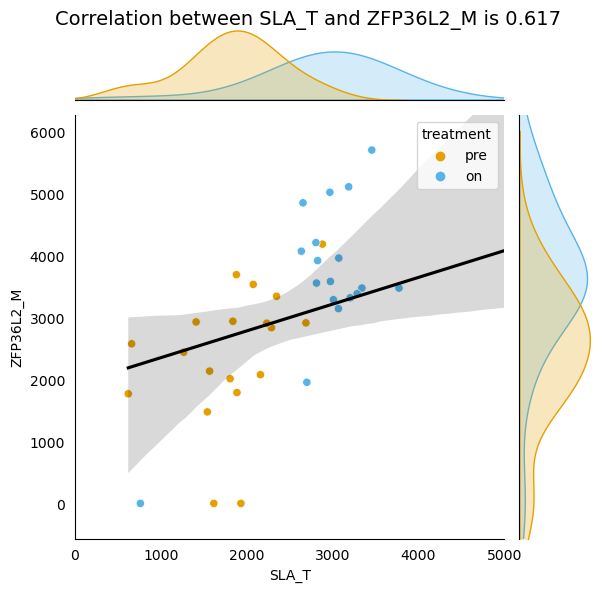

/home/qiuaodon/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/qiuaodon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/qiuaodon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/qiuaodon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

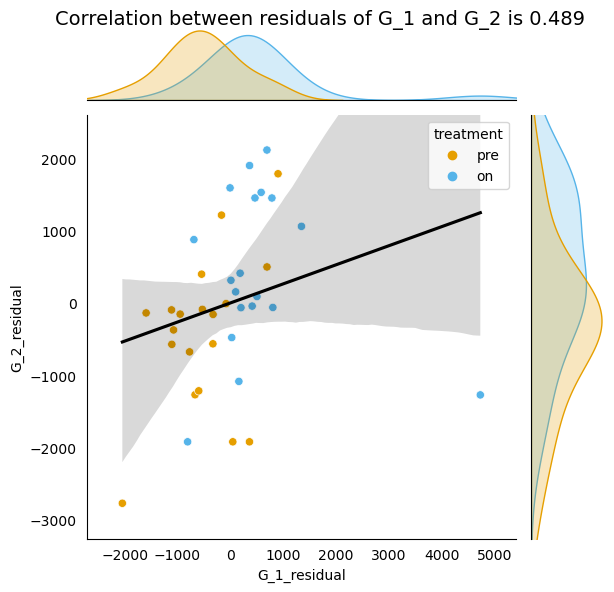

/home/qiuaodon/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/qiuaodon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/qiuaodon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/qiuaodon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

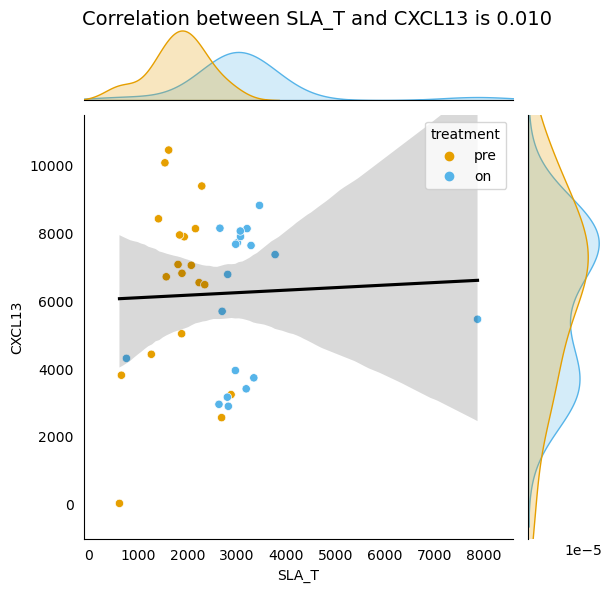

/home/qiuaodon/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/qiuaodon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/qiuaodon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/qiuaodon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

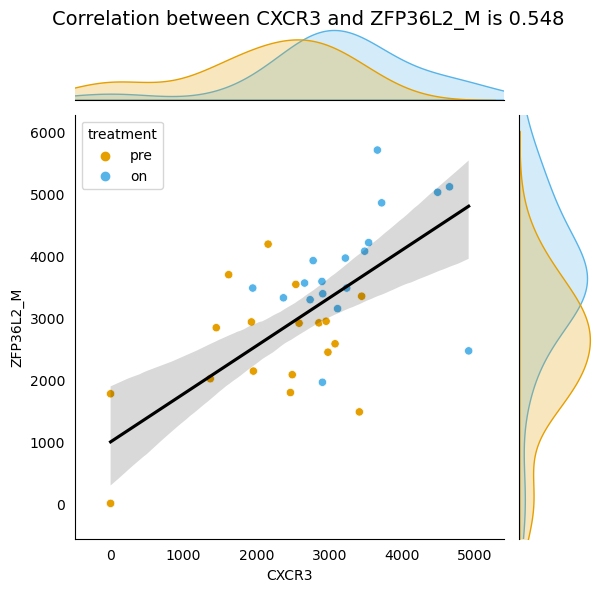

/home/qiuaodon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/qiuaodon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/qiuaodon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/qiuaodon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

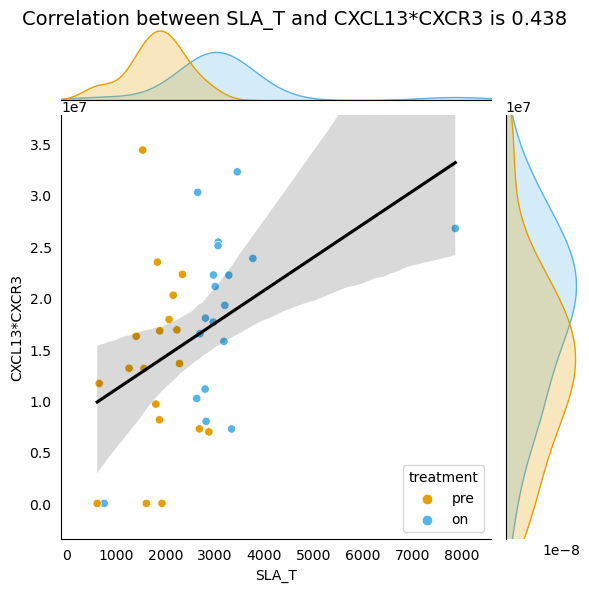

/home/qiuaodon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/qiuaodon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/qiuaodon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/qiuaodon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

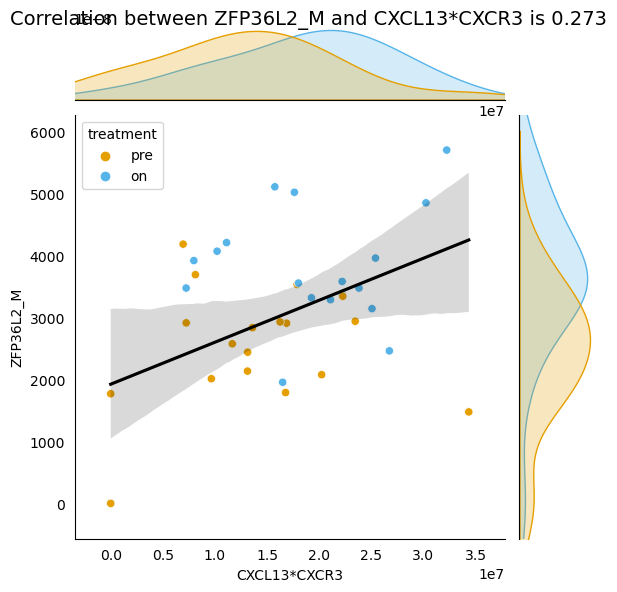

In [47]:
plot_CIT_DEGcorr('SLA_T', 'ZFP36L2_M', 'CXCL13', 'CXCR3', gene_df, adata_T_pseudo, adata_M_pseudo)

/tmp/ipykernel_3464115/1892191964.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gene_df['treatment'] = gene_df['treatment'].replace({0: 'pre', 1: 'on'})
/home/qiuaodon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/qiuaodon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/qiuaodon/anaconda3/lib/python3.11/site-packages/seaborn/

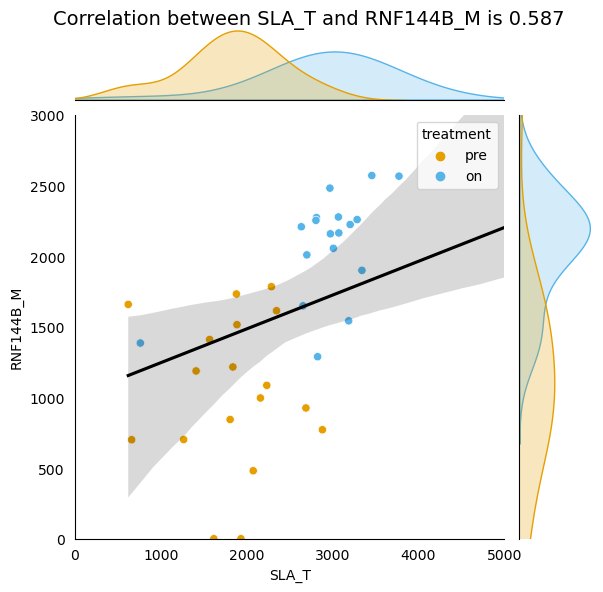

/home/qiuaodon/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/qiuaodon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/qiuaodon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/qiuaodon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

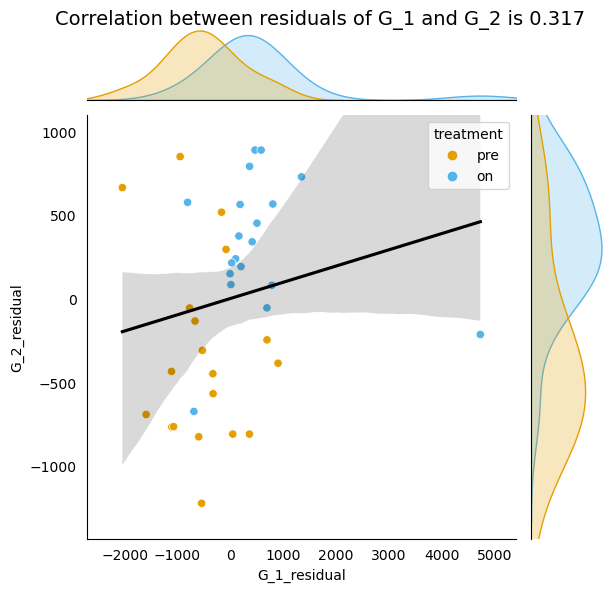

/home/qiuaodon/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/qiuaodon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/qiuaodon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/qiuaodon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

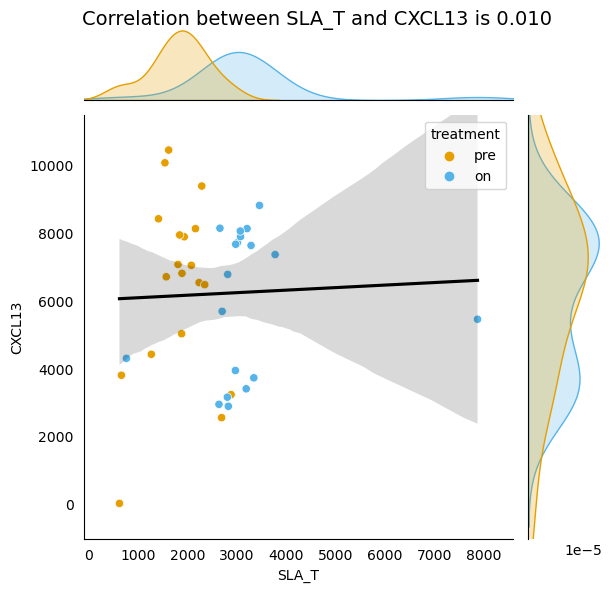

/home/qiuaodon/anaconda3/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/qiuaodon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/qiuaodon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/qiuaodon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

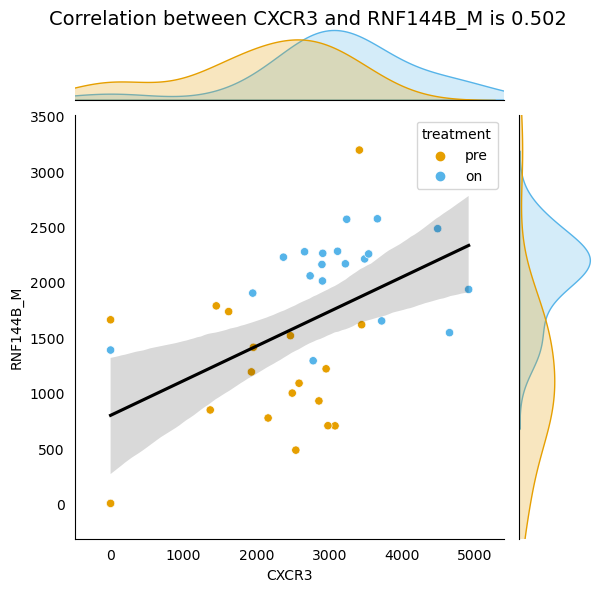

/home/qiuaodon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/qiuaodon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/qiuaodon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/qiuaodon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

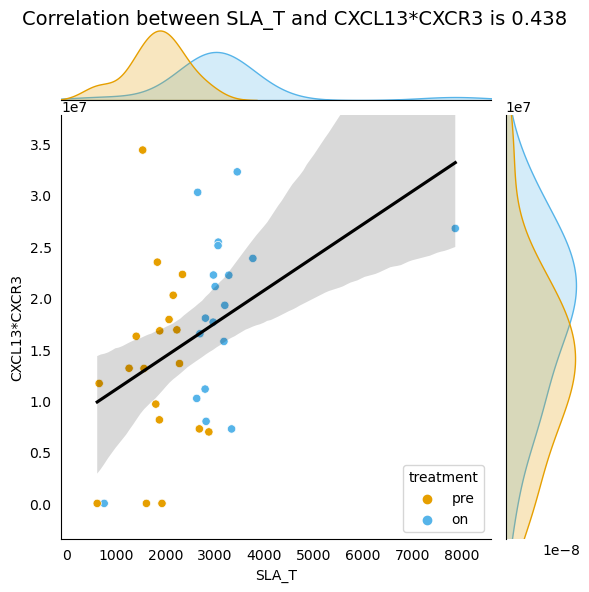

/home/qiuaodon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/qiuaodon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/qiuaodon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/qiuaodon/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

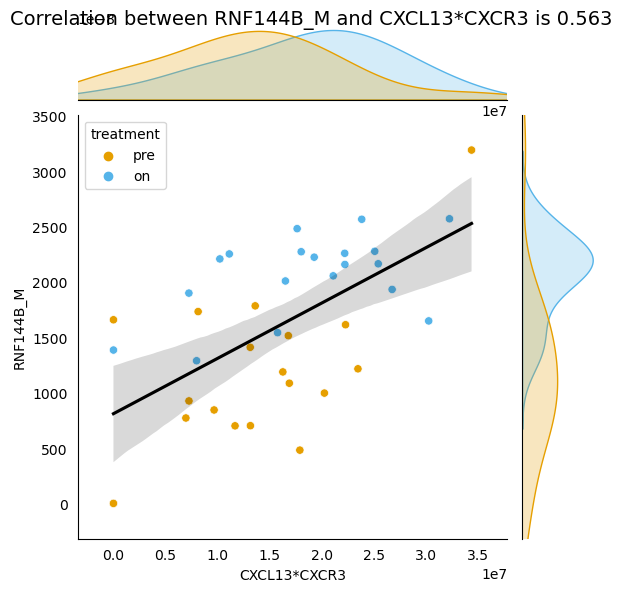

In [50]:
plot_CIT_DEGcorr('SLA_T', 'RNF144B_M', 'CXCL13', 'CXCR3', gene_df, adata_T_pseudo, adata_M_pseudo)

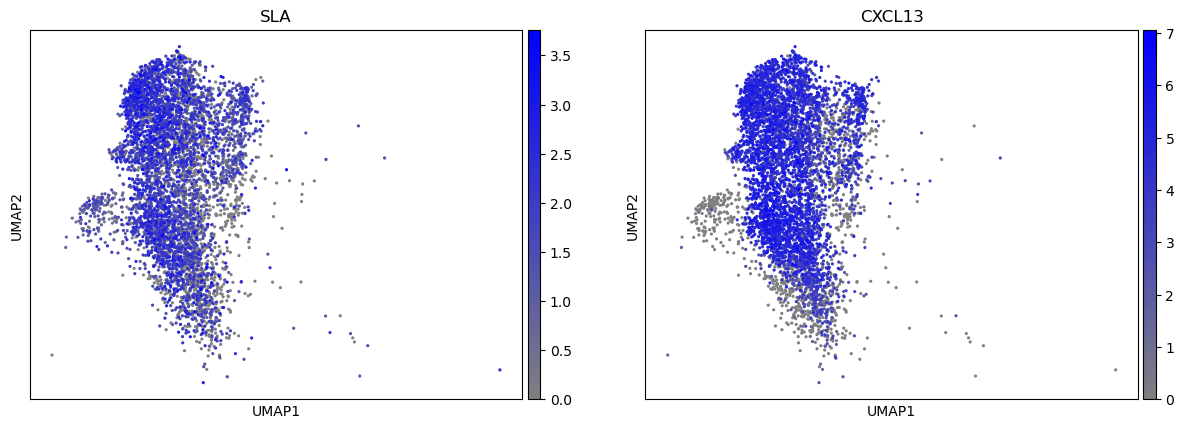

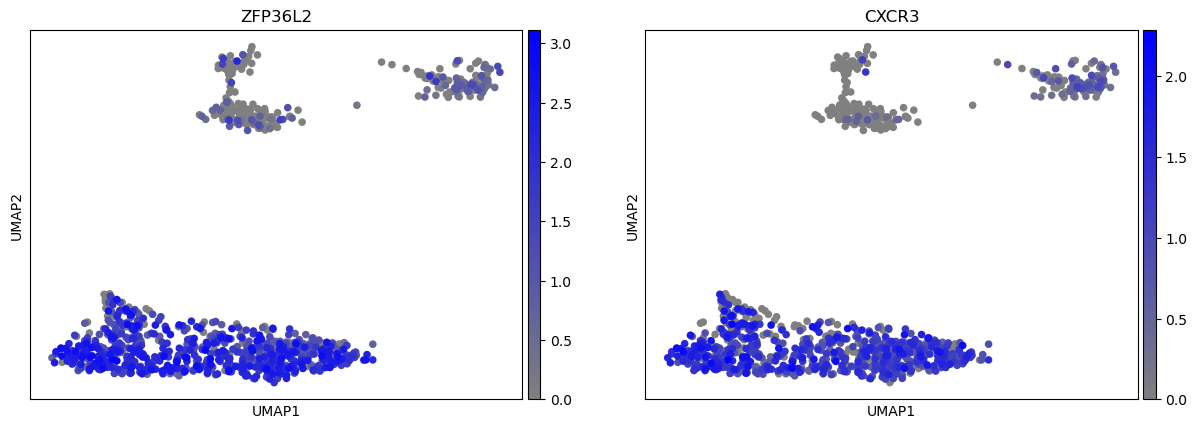

In [9]:
import matplotlib.colors as mcolors

# Rest of the code
colors = ["grey", "blue"]  # Start with grey and end with blue
cmap = mcolors.LinearSegmentedColormap.from_list("grey_to_blue", colors)

sc.pl.umap(adata_T_CD4EX, color=['SLA', 'CXCL13'], color_map=cmap)
sc.pl.umap(adata_M_DC, color=['ZFP36L2', 'CXCR3'], color_map=cmap)
